<a href="https://colab.research.google.com/github/komalbarkar/Data-Science-Project/blob/master/skin_cancer_malignant_vs_benign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import some modules**

In [0]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

**Setting Directory**

In [0]:
train_dir ="C:\\Users\\Nilesh\\Desktop\\dl\\skin-cancer-malignant-vs-benign\\train"
test_dir ="C:\\Users\\Nilesh\\Desktop\\dl\\skin-cancer-malignant-vs-benign\\test"

**Images of Benign Type**

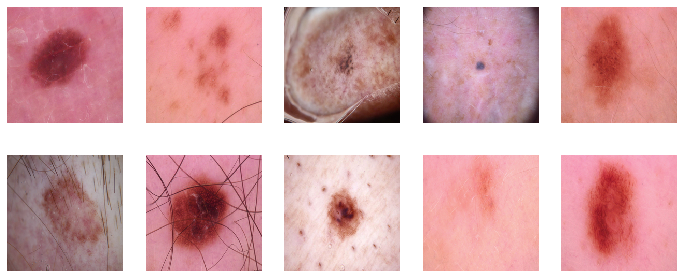

In [0]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\benign\\19.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\benign\\20.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\benign\\32.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\benign\\33.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\benign\\34.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\benign\\35.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\benign\\524.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\benign\\525.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\benign\\526.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\benign\\528.jpg")
plt.imshow(img)

**Images of Malignant**

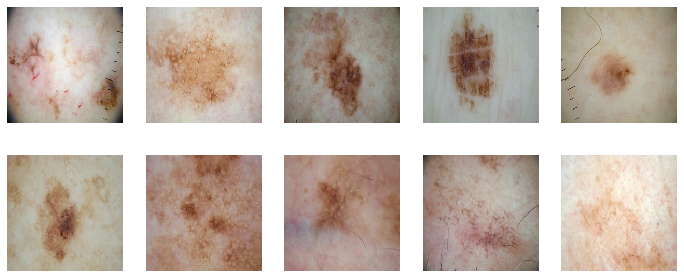

In [0]:
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\malignant\\2.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\malignant\\5.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\malignant\\6.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\malignant\\7.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\malignant\\9.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\malignant\\10.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\malignant\\11.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\malignant\\12.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\malignant\\14.jpg")
plt.imshow(img)
sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread(train_dir+"\\malignant\\15.jpg")
plt.imshow(img)

In [0]:
import tensorflow as tf

In [0]:
train_dir ="C:\\Users\\Nilesh\\Desktop\\dl\\skin-cancer-malignant-vs-benign\\train"
test_dir ="C:\\Users\\Nilesh\\Desktop\\dl\\skin-cancer-malignant-vs-benign\\test"

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [0]:
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


**Formation OF CNN**

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1, seed=2019),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2, seed=2020),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [0]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto',restore_best_weights=True)
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

**Fitting the model**

In [0]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,epochs=15,
                              validation_steps=50,
                              verbose=2, callbacks=[monitor])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 3095s - loss: 0.6015 - acc: 0.7296 - val_loss: 0.3090 - val_acc: 0.7682


In [0]:
testing_datagen  = ImageDataGenerator( rescale = 1.0/255. )
testing_dir = "C:\\Users\\Nilesh\\Desktop\\dl\\skin-cancer-malignant-vs-benign\\Testing"
testing_generator =  testing_datagen.flow_from_directory(testing_dir,
                                                    batch_size=6,
                                                    class_mode  = None,
                                                    target_size = (150, 150),
                                                    shuffle=False)

Found 12 images belonging to 1 classes.


In [0]:
y_prob = model.predict_generator(testing_generator,callbacks=[monitor])
y_pred = ["benign" if probs > 0.5 else "malignant" for probs in y_prob]

In [0]:
y_prob

array([[0.23451807],
       [0.5772209 ],
       [0.06489408],
       [0.54900604],
       [0.5194239 ],
       [0.6042896 ],
       [0.67083824],
       [0.540661  ],
       [0.53654486],
       [0.49324873],
       [0.42113   ],
       [0.42949694]], dtype=float32)

In [0]:
y_pred

['malignant',
 'benign',
 'malignant',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'malignant',
 'malignant',
 'malignant']